# 📊 Fase 3: Análisis de Features Avanzadas

Este notebook explora las **114 features** generadas en la Fase 3.

## Contenido
1. Carga y exploración del dataset
2. Análisis de features ELO
3. Análisis de features de servicio/resto
4. Análisis de features de fatiga
5. Análisis de forma reciente
6. Análisis H2H y superficie
7. Correlaciones entre features
8. Feature importance preliminar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Configuración de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.3f}'.format)

## 1. Carga y Exploración del Dataset

In [2]:
# Cargar dataset con features de Fase 3
df = pd.read_csv('../datos/processed/dataset_features_fase3_completas.csv')

print(f"📊 Dataset cargado")
print(f"   Filas: {len(df):,}")
print(f"   Columnas: {len(df.columns)}")
print(f"   Tamaño en memoria: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

📊 Dataset cargado
   Filas: 30,324
   Columnas: 116
   Tamaño en memoria: 28.31 MB


In [3]:
# Información básica
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30324 entries, 0 to 30323
Columns: 116 entries, jugador_rank to fecha
dtypes: float64(59), int64(56), object(1)
memory usage: 26.8+ MB


In [4]:
# Primeras filas
df.head()

,jugador_rank,oponente_rank,rank_diff,rank_ratio,jugador_top10,oponente_top10,jugador_top50,oponente_top50,surface_hard,surface_clay,surface_grass,jugador_elo,oponente_elo,elo_diff,jugador_elo_surface,oponente_elo_surface,elo_diff_surface,elo_expected_prob,j1_partidos_ultimos_60d,j1_victorias_ultimos_60d,j1_win_rate_60d,j1_racha_actual,j1_victorias_ponderadas_60d,j2_partidos_ultimos_60d,j2_victorias_ultimos_60d,j2_win_rate_60d,j2_racha_actual,j2_victorias_ponderadas_60d,diff_win_rate_60d,diff_racha,h2h_total_partidos,h2h_victorias,h2h_win_rate,h2h_superficie_rate,h2h_reciente_rate,j1_serve_aces_pct,j1_serve_aces_per_match,j1_serve_df_pct,j1_serve_first_serve_in_pct,j1_serve_first_serve_won_pct,j1_serve_second_serve_won_pct,j1_serve_bp_saved_pct,j1_serve_aces_total,j1_serve_df_total,j1_serve_bp_faced,j1_serve_bp_saved,j1_serve_total_svpt,j1_return_bp_opportunities,j1_return_bp_converted,j1_return_bp_conversion_pct,j1_return_return_quality_score,j2_serve_aces_pct,j2_serve_aces_per_match,j2_serve_df_pct,j2_serve_first_serve_in_pct,j2_serve_first_serve_won_pct,j2_serve_second_serve_won_pct,j2_serve_bp_saved_pct,j2_serve_aces_total,j2_serve_df_total,j2_serve_bp_faced,j2_serve_bp_saved,j2_serve_total_svpt,j2_return_bp_opportunities,j2_return_bp_converted,j2_return_bp_conversion_pct,j2_return_return_quality_score,j1_serve_power,j2_return_power,serve_vs_return_advantage,j1_fatiga_dias_desde_ultimo_partido,j1_fatiga_dias_desde_ultimo_normalizado,j1_fatiga_partidos_ultimos_7d,j1_fatiga_partidos_ultimos_14d,j1_fatiga_partidos_ultimos_30d,j1_fatiga_minutos_ultimos_7d,j1_fatiga_minutos_ultimos_14d,j1_fatiga_minutos_por_partido_7d,j1_fatiga_torneo_largo,j1_fatiga_bien_descansado,j1_fatiga_sin_ritmo,j1_fatiga_recien_jugado,j1_fatiga_carga_reciente_score,j2_fatiga_dias_desde_ultimo_partido,j2_fatiga_dias_desde_ultimo_normalizado,j2_fatiga_partidos_ultimos_7d,j2_fatiga_partidos_ultimos_14d,j2_fatiga_partidos_ultimos_30d,j2_fatiga_minutos_ultimos_7d,j2_fatiga_minutos_ultimos_14d,j2_fatiga_minutos_por_partido_7d,j2_fatiga_torneo_largo,j2_fatiga_bien_descansado,j2_fatiga_sin_ritmo,j2_fatiga_recien_jugado,j2_fatiga_carga_reciente_score,diff_dias_descanso,diff_partidos_7d,diff_partidos_14d,diff_minutos_7d,diff_carga_score,j1_mas_fresco,j1_mas_activo,ambos_cansados,j1_torneo_largo_j2_no,ventaja_superficie,win_rate_j1_superficie,win_rate_j2_superficie,es_superficie_favorita_j1,es_superficie_favorita_j2,rank_diff_x_forma,h2h_x_forma_actual,superficie_x_rank,elo_x_forma,resultado,fecha
0,11.000,46.000,35.000,0.239,0,0,1,1,1,0,0,1490.068,1427.401,62.668,1490.068,1471.971,18.098,0.589,0,0,0.500,0,0.500,0,0,0.500,0,0.500,0.000,0,0,0,0.500,0.500,0.500,0.080,5.000,0.040,0.620,0.680,0.480,0.600,0,0,0,0,0,0,0,0.350,0.350,0.080,5.000,0.040,0.620,0.680,0.480,0.600,0,0,0,0,0,0,0,0.350,0.350,0.484,0.350,0.134,7,0.500,1,2,4,120.000,240.000,120.000,0,0,0,0,0.300,7,0.500,1,2,4,120.000,240.000,120.000,0,0,0,0,0.300,0,0,0,0.000,0.000,0,0,0,0,0.000,0.500,0.500,1,1,17.500,0.250,0.000,0.000,1,2020-01-03
1,46.000,11.000,-35.000,4.182,0,0,1,1,1,0,0,1427.401,1490.068,-62.668,1471.971,1490.068,-18.098,0.411,0,0,0.500,0,0.500,0,0,0.500,0,0.500,0.000,0,0,0,0.500,0.500,0.500,0.080,5.000,0.040,0.620,0.680,0.480,0.600,0,0,0,0,0,0,0,0.350,0.350,0.080,5.000,0.040,0.620,0.680,0.480,0.600,0,0,0,0,0,0,0,0.350,0.350,0.484,0.350,0.134,7,0.500,1,2,4,120.000,240.000,120.000,0,0,0,0,0.300,7,0.500,1,2,4,120.000,240.000,120.000,0,0,0,0,0.300,0,0,0,0.000,0.000,0,0,0,0,0.000,0.500,0.500,1,1,-17.500,0.250,-0.000,-0.000,0,2020-01-03
2,91.000,33.000,-58.000,2.758,0,0,0,1,1,0,0,1403.539,1541.870,-138.330,1403.539,1512.966,-109.427,0.311,0,0,0.500,0,0.500,0,0,0.500,0,0.500,0.000,0,0,0,0.500,0.500,0.500,0.080,5.000,0.040,0.620,0.680,0.480,0.600,0,0,0,0,0,0,0,0.350,0.350,0.080,5.000,0.040,0.620,0.680,0.480,0.600,0,0,0,0,0,0,0,0.350,0.350,0.484,0.350,0.134,7,0.500,1,2,4,120.000,240.000,120.000,0,0,0,0,0.300,7,0.500,1,2,4,120.000,240.000,120.000,0,0,0,0,0.300,0,0,0,0.000,0.000,0,0,0,0,0.000,0.500,0.500


⚖️ Balance de Clases:
resultado
1    15162
0    15162
Name: count, dtype: int64

Porcentaje de victorias: 50.00%


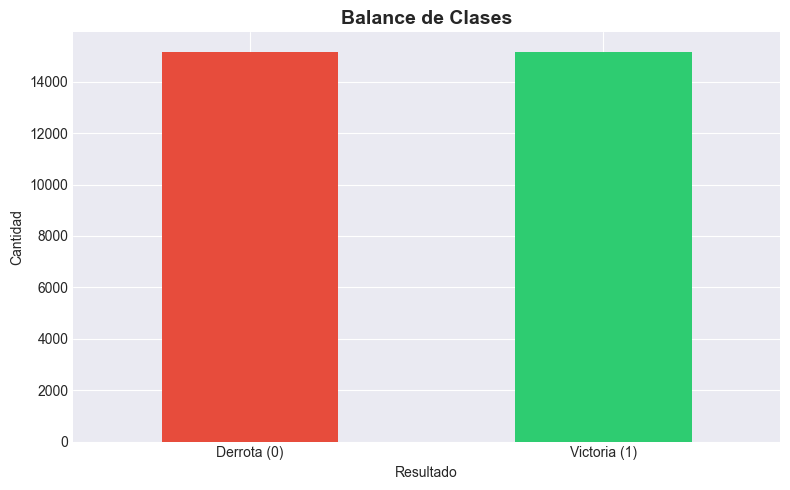

In [5]:
# Balance de clases
print("\n⚖️ Balance de Clases:")
print(df['resultado'].value_counts())
print(f"\nPorcentaje de victorias: {df['resultado'].mean()*100:.2f}%")

# Visualizar
plt.figure(figsize=(8, 5))
df['resultado'].value_counts().plot(kind='bar', color=['#e74c3c', '#2ecc71'])
plt.title('Balance de Clases', fontsize=14, fontweight='bold')
plt.xlabel('Resultado')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['Derrota (0)', 'Victoria (1)'], rotation=0)
plt.tight_layout()
plt.show()

In [6]:
# Valores faltantes
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

if missing.sum() > 0:
    print("⚠️ Columnas con valores faltantes:")
    missing_df = pd.DataFrame({
        'Columna': missing.index,
        'Faltantes': missing.values,
        'Porcentaje': missing_pct.values
    })
    print(missing_df[missing_df['Faltantes'] > 0].sort_values('Faltantes', ascending=False))
else:
    print("✅ No hay valores faltantes")

✅ No hay valores faltantes


## 2. Análisis de Features ELO ⭐⭐⭐

In [7]:
# Features ELO
elo_features = [col for col in df.columns if 'elo' in col.lower()]
print(f"\n🎯 Features ELO ({len(elo_features)}):")
for feat in elo_features:
    print(f"   - {feat}")


🎯 Features ELO (8):
   - jugador_elo
   - oponente_elo
   - elo_diff
   - jugador_elo_surface
   - oponente_elo_surface
   - elo_diff_surface
   - elo_expected_prob
   - elo_x_forma


In [8]:
# Estadísticas de ELO
print("\n📊 Estadísticas de ELO:")
print(df[['jugador_elo', 'oponente_elo', 'elo_diff']].describe())


📊 Estadísticas de ELO:
       jugador_elo  oponente_elo  elo_diff
count    30324.000     30324.000 30324.000
mean      1588.260      1588.260     0.000
std        153.873       153.873   200.717
min       1316.458      1316.458  -844.341
25%       1477.608      1477.608  -116.217
50%       1550.580      1550.580     0.000
75%       1665.859      1665.859   116.217
max       2199.167      2199.167   844.341


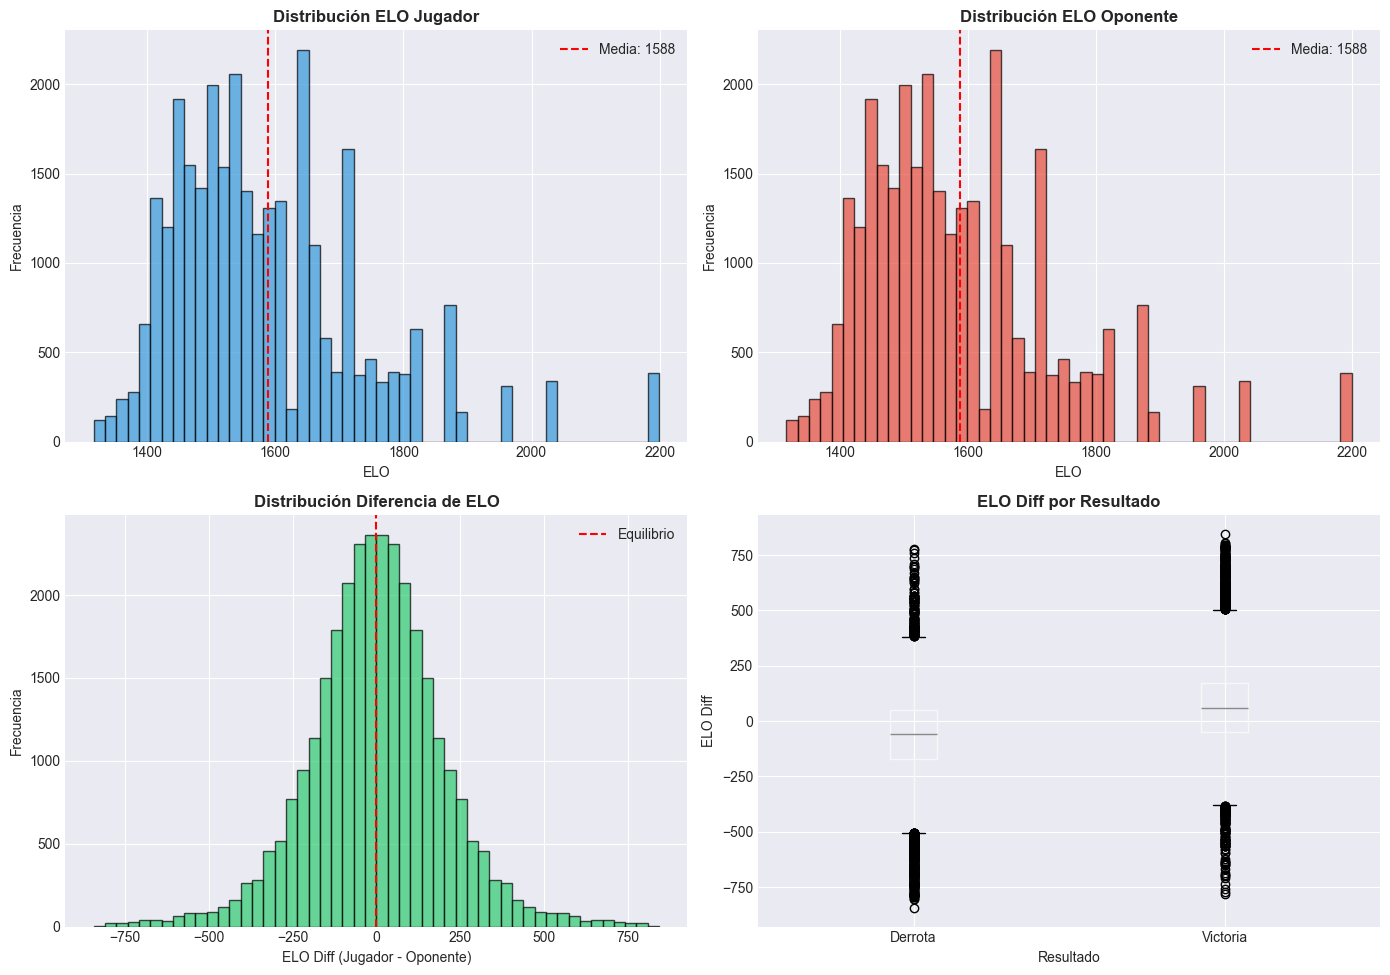

In [9]:
# Distribución de ELO
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# ELO Jugador
axes[0, 0].hist(df['jugador_elo'], bins=50, color='#3498db', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Distribución ELO Jugador', fontweight='bold')
axes[0, 0].set_xlabel('ELO')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].axvline(df['jugador_elo'].mean(), color='red', linestyle='--', label=f'Media: {df["jugador_elo"].mean():.0f}')
axes[0, 0].legend()

# ELO Oponente
axes[0, 1].hist(df['oponente_elo'], bins=50, color='#e74c3c', alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Distribución ELO Oponente', fontweight='bold')
axes[0, 1].set_xlabel('ELO')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].axvline(df['oponente_elo'].mean(), color='red', linestyle='--', label=f'Media: {df["oponente_elo"].mean():.0f}')
axes[0, 1].legend()

# Diferencia de ELO
axes[1, 0].hist(df['elo_diff'], bins=50, color='#2ecc71', alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Distribución Diferencia de ELO', fontweight='bold')
axes[1, 0].set_xlabel('ELO Diff (Jugador - Oponente)')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].axvline(0, color='red', linestyle='--', label='Equilibrio')
axes[1, 0].legend()

# ELO vs Resultado
df.boxplot(column='elo_diff', by='resultado', ax=axes[1, 1])
axes[1, 1].set_title('ELO Diff por Resultado', fontweight='bold')
axes[1, 1].set_xlabel('Resultado')
axes[1, 1].set_ylabel('ELO Diff')
axes[1, 1].set_xticklabels(['Derrota', 'Victoria'])
plt.suptitle('')

plt.tight_layout()
plt.show()

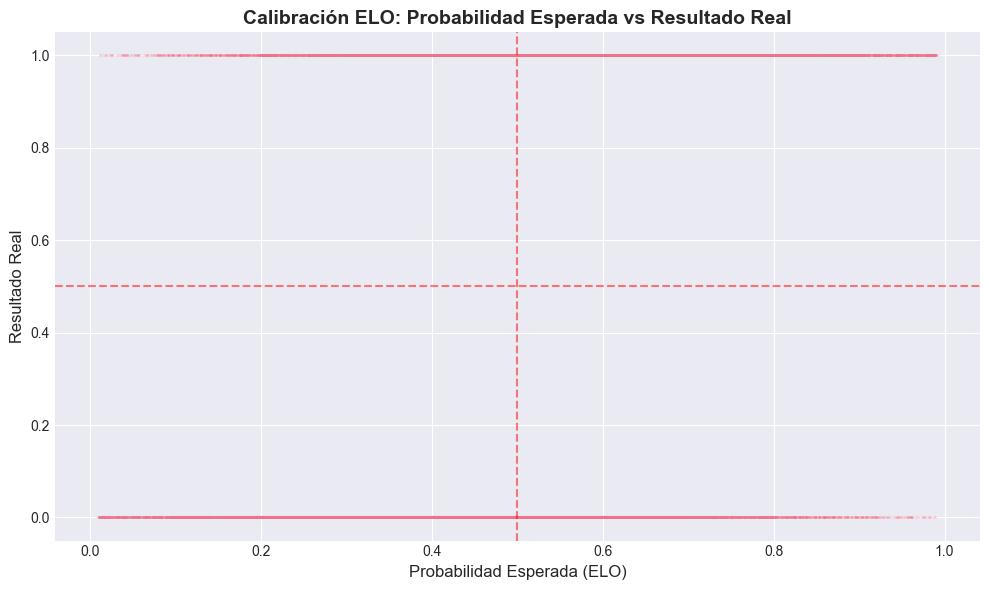


🎯 Accuracy del ELO solo: 63.98%


In [10]:
# Probabilidad esperada por ELO vs Resultado real
plt.figure(figsize=(10, 6))
plt.scatter(df['elo_expected_prob'], df['resultado'], alpha=0.1, s=1)
plt.xlabel('Probabilidad Esperada (ELO)', fontsize=12)
plt.ylabel('Resultado Real', fontsize=12)
plt.title('Calibración ELO: Probabilidad Esperada vs Resultado Real', fontsize=14, fontweight='bold')
plt.axhline(0.5, color='red', linestyle='--', alpha=0.5)
plt.axvline(0.5, color='red', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Accuracy del ELO
elo_predictions = (df['elo_expected_prob'] >= 0.5).astype(int)
elo_accuracy = (elo_predictions == df['resultado']).mean()
print(f"\n🎯 Accuracy del ELO solo: {elo_accuracy*100:.2f}%")

## 3. Análisis de Features de Servicio/Resto ⭐⭐⭐

In [11]:
# Features de servicio
serve_features = [col for col in df.columns if 'serve' in col.lower() or 'aces' in col.lower() or 'bp_saved' in col.lower()]
print(f"\n🎾 Features de Servicio ({len(serve_features)}):")
for feat in serve_features[:10]:  # Mostrar primeras 10
    print(f"   - {feat}")
if len(serve_features) > 10:
    print(f"   ... y {len(serve_features) - 10} más")


🎾 Features de Servicio (26):
   - j1_serve_aces_pct
   - j1_serve_aces_per_match
   - j1_serve_df_pct
   - j1_serve_first_serve_in_pct
   - j1_serve_first_serve_won_pct
   - j1_serve_second_serve_won_pct
   - j1_serve_bp_saved_pct
   - j1_serve_aces_total
   - j1_serve_df_total
   - j1_serve_bp_faced
   ... y 16 más


In [12]:
# Estadísticas de servicio del jugador
serve_cols_j1 = [col for col in df.columns if col.startswith('j1_serve_')]
if len(serve_cols_j1) > 0:
    print("\n📊 Estadísticas de Servicio (Jugador 1):")
    print(df[serve_cols_j1].describe())


📊 Estadísticas de Servicio (Jugador 1):
       j1_serve_aces_pct  j1_serve_aces_per_match  j1_serve_df_pct  \
count          30324.000                30324.000        30324.000   
mean               0.078                    6.139            0.036   
std                0.039                    3.455            0.017   
min                0.000                    0.000            0.000   
25%                0.050                    3.889            0.025   
50%                0.076                    5.188            0.035   
75%                0.097                    7.857            0.042   
max                0.353                   38.000            0.206   

       j1_serve_first_serve_in_pct  j1_serve_first_serve_won_pct  \
count                    30324.000                     30324.000   
mean                         0.624                         0.710   
std                          0.044                         0.052   
min                          0.333                      

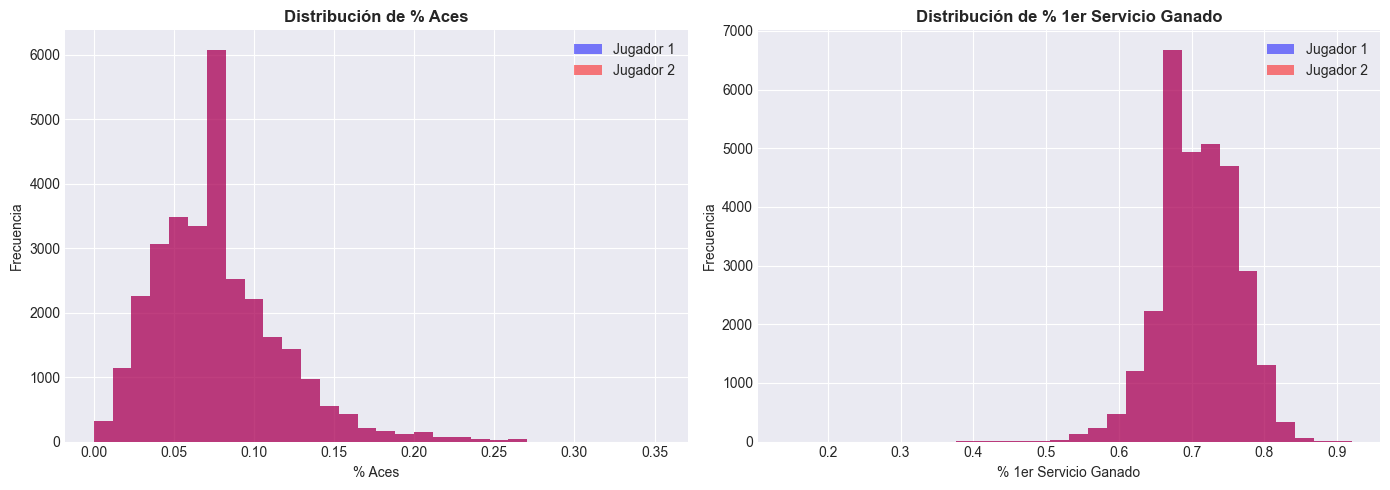

In [13]:
# Distribución de aces
if 'j1_serve_aces_pct' in df.columns and 'j2_serve_aces_pct' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Aces %
    axes[0].hist(df['j1_serve_aces_pct'], bins=30, alpha=0.5, label='Jugador 1', color='blue')
    axes[0].hist(df['j2_serve_aces_pct'], bins=30, alpha=0.5, label='Jugador 2', color='red')
    axes[0].set_title('Distribución de % Aces', fontweight='bold')
    axes[0].set_xlabel('% Aces')
    axes[0].set_ylabel('Frecuencia')
    axes[0].legend()
    
    # 1er servicio ganado %
    if 'j1_serve_first_serve_won_pct' in df.columns:
        axes[1].hist(df['j1_serve_first_serve_won_pct'], bins=30, alpha=0.5, label='Jugador 1', color='blue')
        axes[1].hist(df['j2_serve_first_serve_won_pct'], bins=30, alpha=0.5, label='Jugador 2', color='red')
        axes[1].set_title('Distribución de % 1er Servicio Ganado', fontweight='bold')
        axes[1].set_xlabel('% 1er Servicio Ganado')
        axes[1].set_ylabel('Frecuencia')
        axes[1].legend()
    
    plt.tight_layout()
    plt.show()

## 4. Análisis de Features de Fatiga ⭐⭐

In [14]:
# Features de fatiga
fatiga_features = [col for col in df.columns if 'fatiga' in col.lower() or 'dias_desde' in col.lower() or 'partidos_ultimos' in col.lower()]
print(f"\n😴 Features de Fatiga ({len(fatiga_features)}):")
for feat in fatiga_features[:10]:
    print(f"   - {feat}")
if len(fatiga_features) > 10:
    print(f"   ... y {len(fatiga_features) - 10} más")


😴 Features de Fatiga (28):
   - j1_partidos_ultimos_60d
   - j2_partidos_ultimos_60d
   - j1_fatiga_dias_desde_ultimo_partido
   - j1_fatiga_dias_desde_ultimo_normalizado
   - j1_fatiga_partidos_ultimos_7d
   - j1_fatiga_partidos_ultimos_14d
   - j1_fatiga_partidos_ultimos_30d
   - j1_fatiga_minutos_ultimos_7d
   - j1_fatiga_minutos_ultimos_14d
   - j1_fatiga_minutos_por_partido_7d
   ... y 18 más


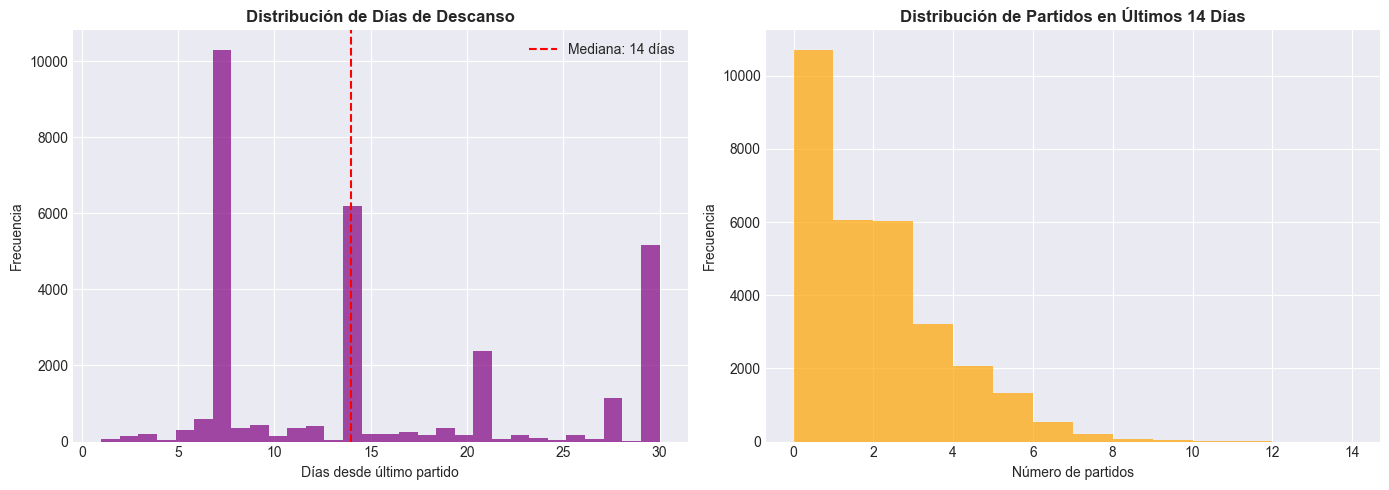

In [15]:
# Distribución de días de descanso
if 'j1_fatiga_dias_desde_ultimo_partido' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Días de descanso
    axes[0].hist(df['j1_fatiga_dias_desde_ultimo_partido'].clip(upper=30), bins=30, alpha=0.7, color='purple')
    axes[0].set_title('Distribución de Días de Descanso', fontweight='bold')
    axes[0].set_xlabel('Días desde último partido')
    axes[0].set_ylabel('Frecuencia')
    axes[0].axvline(df['j1_fatiga_dias_desde_ultimo_partido'].median(), color='red', linestyle='--', 
                    label=f'Mediana: {df["j1_fatiga_dias_desde_ultimo_partido"].median():.0f} días')
    axes[0].legend()
    
    # Partidos en últimos 14 días
    if 'j1_fatiga_partidos_ultimos_14d' in df.columns:
        axes[1].hist(df['j1_fatiga_partidos_ultimos_14d'], bins=range(0, 15), alpha=0.7, color='orange')
        axes[1].set_title('Distribución de Partidos en Últimos 14 Días', fontweight='bold')
        axes[1].set_xlabel('Número de partidos')
        axes[1].set_ylabel('Frecuencia')
    
    plt.tight_layout()
    plt.show()

## 5. Análisis de Forma Reciente ⭐⭐

In [16]:
# Features de forma reciente
forma_features = [col for col in df.columns if 'win_rate_60d' in col or 'racha' in col or 'victorias_ultimos' in col]
print(f"\n📈 Features de Forma Reciente ({len(forma_features)}):")
for feat in forma_features:
    print(f"   - {feat}")


📈 Features de Forma Reciente (8):
   - j1_victorias_ultimos_60d
   - j1_win_rate_60d
   - j1_racha_actual
   - j2_victorias_ultimos_60d
   - j2_win_rate_60d
   - j2_racha_actual
   - diff_win_rate_60d
   - diff_racha


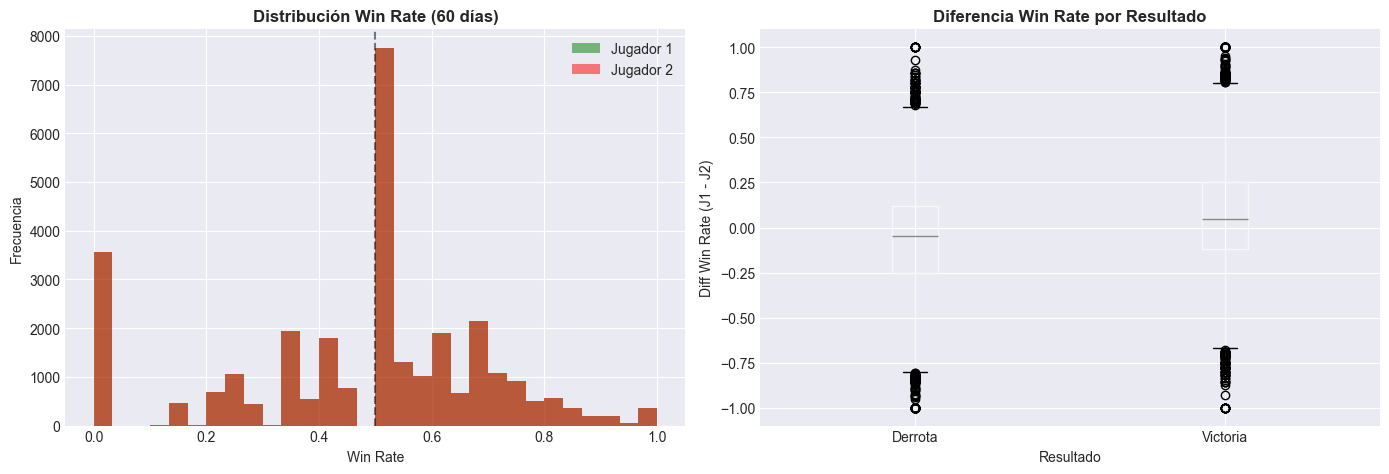

In [17]:
# Win rate últimos 60 días
if 'j1_win_rate_60d' in df.columns and 'j2_win_rate_60d' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Distribución win rate
    axes[0].hist(df['j1_win_rate_60d'], bins=30, alpha=0.5, label='Jugador 1', color='green')
    axes[0].hist(df['j2_win_rate_60d'], bins=30, alpha=0.5, label='Jugador 2', color='red')
    axes[0].set_title('Distribución Win Rate (60 días)', fontweight='bold')
    axes[0].set_xlabel('Win Rate')
    axes[0].set_ylabel('Frecuencia')
    axes[0].axvline(0.5, color='black', linestyle='--', alpha=0.5)
    axes[0].legend()
    
    # Diferencia de win rate vs resultado
    if 'diff_win_rate_60d' in df.columns:
        df.boxplot(column='diff_win_rate_60d', by='resultado', ax=axes[1])
        axes[1].set_title('Diferencia Win Rate por Resultado', fontweight='bold')
        axes[1].set_xlabel('Resultado')
        axes[1].set_ylabel('Diff Win Rate (J1 - J2)')
        axes[1].set_xticklabels(['Derrota', 'Victoria'])
        plt.suptitle('')
    
    plt.tight_layout()
    plt.show()

## 6. Análisis H2H y Superficie

In [18]:
# Features H2H
h2h_features = [col for col in df.columns if 'h2h' in col.lower()]
print(f"\n🎾 Features H2H ({len(h2h_features)}):")
for feat in h2h_features:
    print(f"   - {feat}")


🎾 Features H2H (6):
   - h2h_total_partidos
   - h2h_victorias
   - h2h_win_rate
   - h2h_superficie_rate
   - h2h_reciente_rate
   - h2h_x_forma_actual


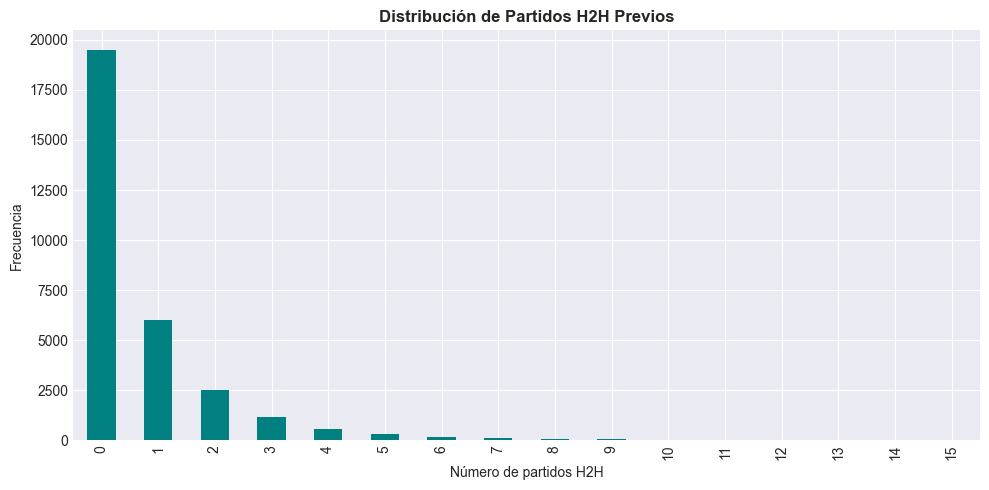


Partidos sin H2H previo: 19,506 (64.3%)


In [19]:
# Distribución de partidos H2H previos
if 'h2h_total_partidos' in df.columns:
    plt.figure(figsize=(10, 5))
    df['h2h_total_partidos'].value_counts().sort_index().plot(kind='bar', color='teal')
    plt.title('Distribución de Partidos H2H Previos', fontweight='bold')
    plt.xlabel('Número de partidos H2H')
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()
    
    print(f"\nPartidos sin H2H previo: {(df['h2h_total_partidos'] == 0).sum():,} ({(df['h2h_total_partidos'] == 0).mean()*100:.1f}%)")

In [20]:
# Features de superficie
superficie_features = [col for col in df.columns if 'superficie' in col.lower() or 'surface' in col.lower()]
print(f"\n🏟️ Features de Superficie ({len(superficie_features)}):")
for feat in superficie_features:
    print(f"   - {feat}")


🏟️ Features de Superficie (13):
   - surface_hard
   - surface_clay
   - surface_grass
   - jugador_elo_surface
   - oponente_elo_surface
   - elo_diff_surface
   - h2h_superficie_rate
   - ventaja_superficie
   - win_rate_j1_superficie
   - win_rate_j2_superficie
   - es_superficie_favorita_j1
   - es_superficie_favorita_j2
   - superficie_x_rank


## 7. Correlaciones entre Features

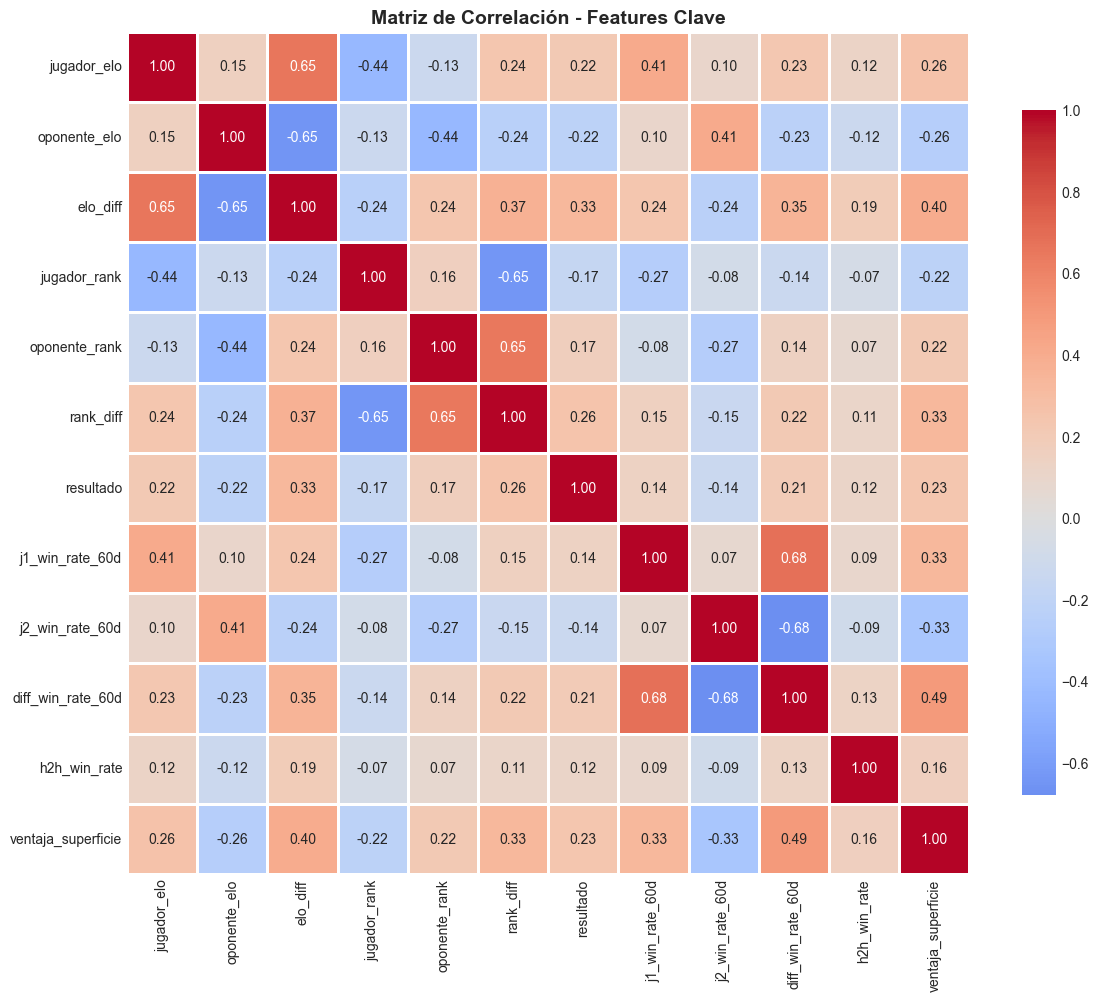

In [21]:
# Seleccionar features numéricas clave
key_features = [
    'jugador_elo', 'oponente_elo', 'elo_diff',
    'jugador_rank', 'oponente_rank', 'rank_diff',
    'resultado'
]

# Añadir features que existan
optional_features = [
    'j1_win_rate_60d', 'j2_win_rate_60d', 'diff_win_rate_60d',
    'h2h_win_rate', 'ventaja_superficie'
]

for feat in optional_features:
    if feat in df.columns:
        key_features.append(feat)

# Matriz de correlación
corr_matrix = df[key_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación - Features Clave', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [22]:
# Correlación con el target (resultado)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'resultado' in numeric_cols:
    numeric_cols.remove('resultado')
if 'fecha' in numeric_cols:
    numeric_cols.remove('fecha')

correlations = df[numeric_cols + ['resultado']].corr()['resultado'].drop('resultado').sort_values(ascending=False)

print("\n🎯 Top 20 Features más correlacionadas con el resultado:")
print(correlations.head(20))

print("\n🎯 Top 20 Features menos correlacionadas (negativas):")
print(correlations.tail(20))


🎯 Top 20 Features más correlacionadas con el resultado:
elo_diff_surface              0.379
elo_expected_prob             0.340
elo_diff                      0.334
rank_diff                     0.258
rank_diff_x_forma             0.252
jugador_elo_surface           0.245
ventaja_superficie            0.234
jugador_elo                   0.218
diff_win_rate_60d             0.206
h2h_x_forma_actual            0.169
oponente_rank                 0.167
jugador_top10                 0.167
j1_victorias_ultimos_60d      0.165
jugador_top50                 0.164
win_rate_j1_superficie        0.160
j1_return_bp_converted        0.158
j1_return_bp_opportunities    0.157
j1_serve_total_svpt           0.142
j1_partidos_ultimos_60d       0.142
j1_victorias_ponderadas_60d   0.140
Name: resultado, dtype: float64

🎯 Top 20 Features menos correlacionadas (negativas):
j2_serve_df_total                -0.100
j2_serve_bp_saved                -0.103
j2_serve_second_serve_won_pct    -0.109
j2_fatiga_partido

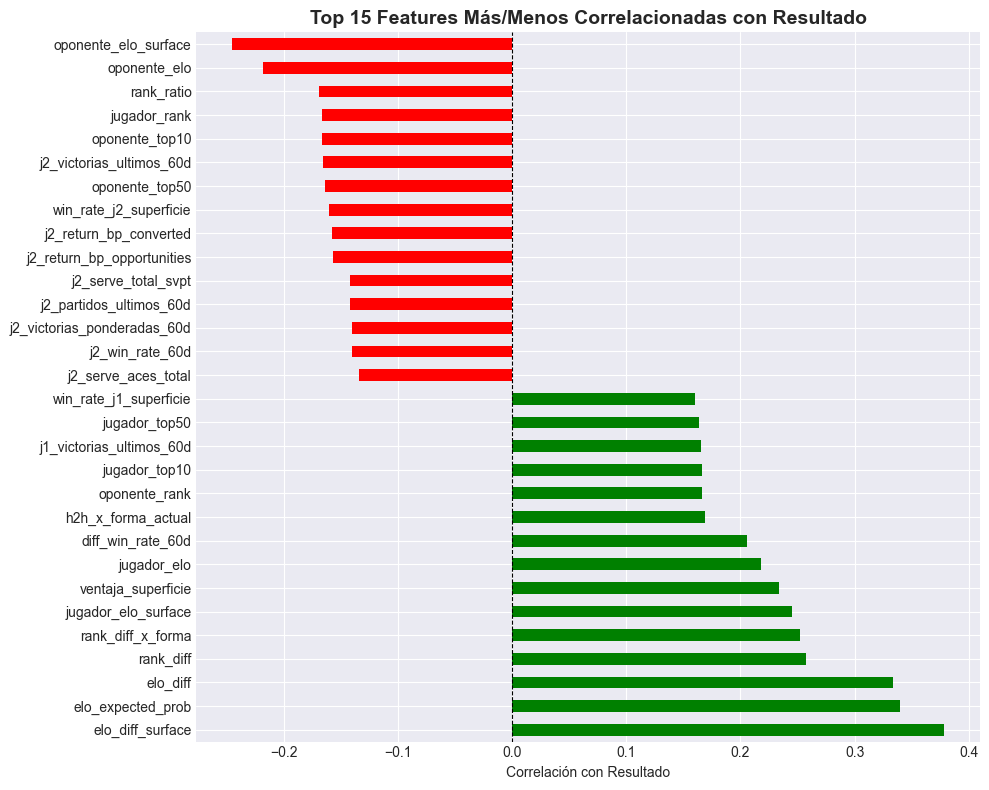

In [23]:
# Visualizar top correlaciones
top_n = 15
top_corr = pd.concat([correlations.head(top_n), correlations.tail(top_n)])

plt.figure(figsize=(10, 8))
colors = ['green' if x > 0 else 'red' for x in top_corr.values]
top_corr.plot(kind='barh', color=colors)
plt.title(f'Top {top_n} Features Más/Menos Correlacionadas con Resultado', fontsize=14, fontweight='bold')
plt.xlabel('Correlación con Resultado')
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

## 8. Feature Importance Preliminar (Random Forest)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Preparar datos
X = df[numeric_cols]
y = df['resultado']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\n📊 Datos preparados:")
print(f"   Train: {len(X_train):,} filas")
print(f"   Test: {len(X_test):,} filas")
print(f"   Features: {len(numeric_cols)}")


📊 Datos preparados:
   Train: 24,259 filas
   Test: 6,065 filas
   Features: 114


In [25]:
# Entrenar Random Forest rápido
print("\n🌲 Entrenando Random Forest...")
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Accuracy
train_acc = rf.score(X_train, y_train)
test_acc = rf.score(X_test, y_test)

print(f"\n✅ Modelo entrenado")
print(f"   Accuracy Train: {train_acc*100:.2f}%")
print(f"   Accuracy Test: {test_acc*100:.2f}%")


🌲 Entrenando Random Forest...



✅ Modelo entrenado
   Accuracy Train: 78.71%
   Accuracy Test: 68.13%


In [26]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': numeric_cols,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\n🎯 Top 20 Features más importantes:")
print(feature_importance.head(20))


🎯 Top 20 Features más importantes:
                         feature  importance
16              elo_diff_surface       0.115
17             elo_expected_prob       0.057
13                      elo_diff       0.049
3                     rank_ratio       0.047
15          oponente_elo_surface       0.040
14           jugador_elo_surface       0.038
2                      rank_diff       0.033
110            rank_diff_x_forma       0.033
1                  oponente_rank       0.023
0                   jugador_rank       0.020
12                  oponente_elo       0.019
105           ventaja_superficie       0.019
113                  elo_x_forma       0.016
11                   jugador_elo       0.014
107       win_rate_j2_superficie       0.013
28             diff_win_rate_60d       0.011
112            superficie_x_rank       0.011
106       win_rate_j1_superficie       0.010
111           h2h_x_forma_actual       0.010
22   j1_victorias_ponderadas_60d       0.010


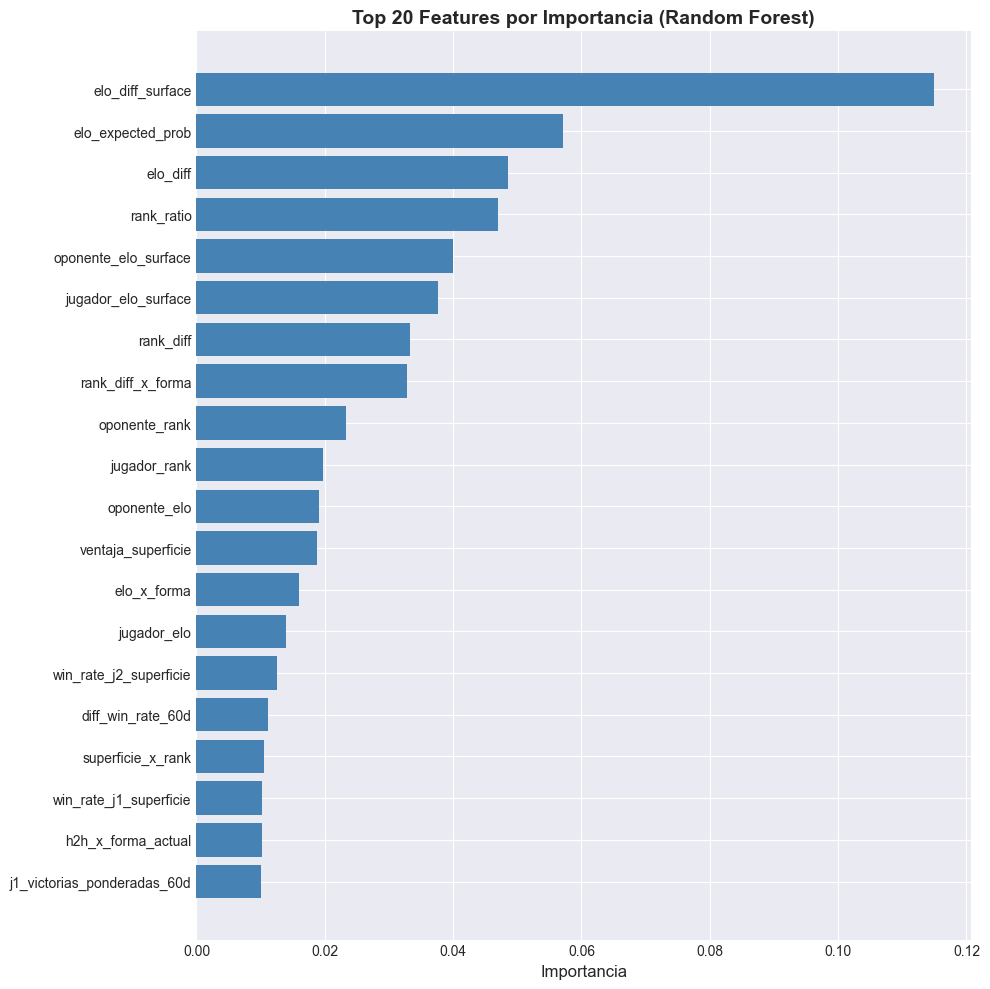

In [27]:
# Visualizar feature importance
plt.figure(figsize=(10, 10))
top_features = feature_importance.head(20)
plt.barh(range(len(top_features)), top_features['importance'].values, color='steelblue')
plt.yticks(range(len(top_features)), top_features['feature'].values)
plt.xlabel('Importancia', fontsize=12)
plt.title('Top 20 Features por Importancia (Random Forest)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 9. Resumen y Conclusiones

In [28]:
print("="*80)
print("📊 RESUMEN FASE 3 - FEATURES AVANZADAS")
print("="*80)

print(f"\n✅ Dataset:")
print(f"   Total filas: {len(df):,}")
print(f"   Total features: {len(numeric_cols)}")
print(f"   Balance: {df['resultado'].mean()*100:.1f}% victorias")
print(f"   Valores faltantes: {df.isnull().sum().sum()}")

print(f"\n🎯 Accuracy Preliminar (Random Forest):")
print(f"   Train: {train_acc*100:.2f}%")
print(f"   Test: {test_acc*100:.2f}%")

print(f"\n⭐ Top 5 Features más importantes:")
for i, row in feature_importance.head(5).iterrows():
    print(f"   {row['feature']}: {row['importance']:.4f}")

print(f"\n🎯 Próximos pasos:")
print(f"   1. Comparar múltiples algoritmos (XGBoost, LightGBM, etc.)")
print(f"   2. Hyperparameter tuning")
print(f"   3. Feature selection (eliminar features poco importantes)")
print(f"   4. Calibración de probabilidades")

print("\n" + "="*80)

📊 RESUMEN FASE 3 - FEATURES AVANZADAS

✅ Dataset:
   Total filas: 30,324
   Total features: 114
   Balance: 50.0% victorias
   Valores faltantes: 0

🎯 Accuracy Preliminar (Random Forest):
   Train: 78.71%
   Test: 68.13%

⭐ Top 5 Features más importantes:
   elo_diff_surface: 0.1150
   elo_expected_prob: 0.0571
   elo_diff: 0.0486
   rank_ratio: 0.0469
   oponente_elo_surface: 0.0401

🎯 Próximos pasos:
   1. Comparar múltiples algoritmos (XGBoost, LightGBM, etc.)
   2. Hyperparameter tuning
   3. Feature selection (eliminar features poco importantes)
   4. Calibración de probabilidades

